In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
data = pd.read_csv("ifood_df.csv")
#data = data.sample(n=1000, random_state=42)

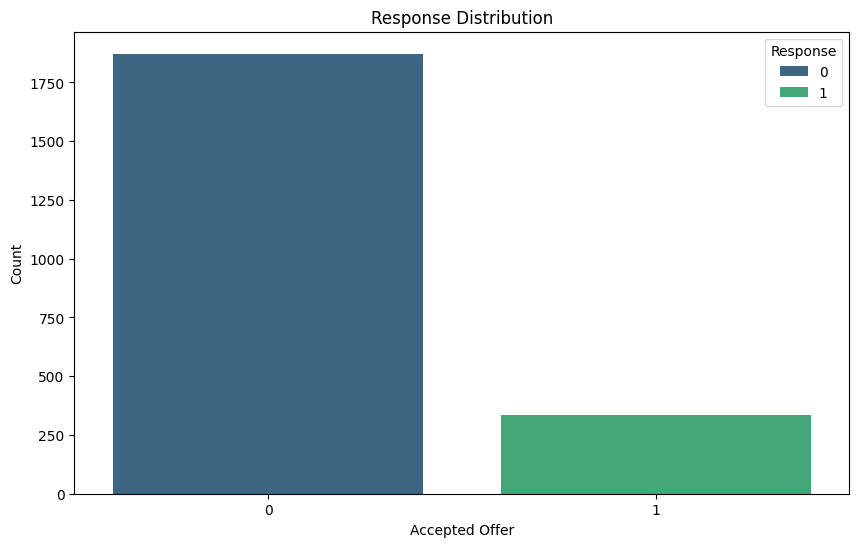

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=data, hue='Response', palette='viridis')
plt.title("Response Distribution")
plt.xlabel("Accepted Offer")
plt.ylabel("Count")
plt.show()

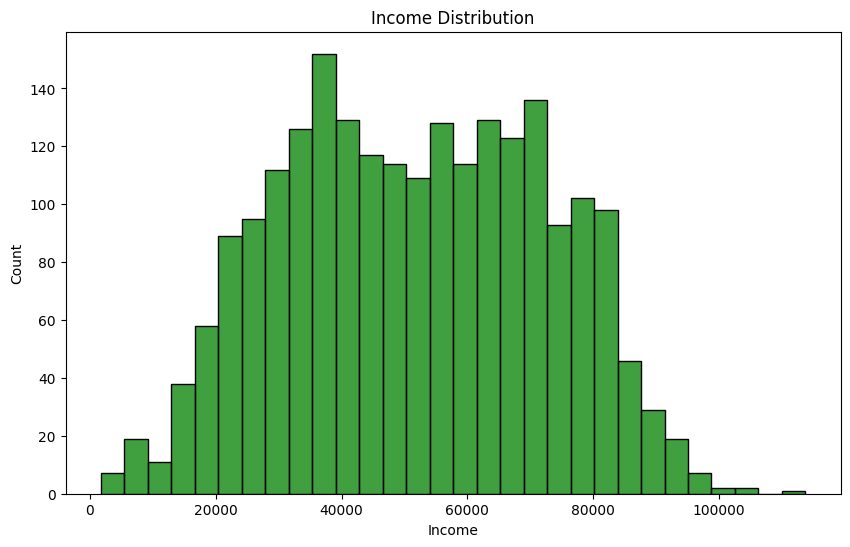

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, color="green")
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

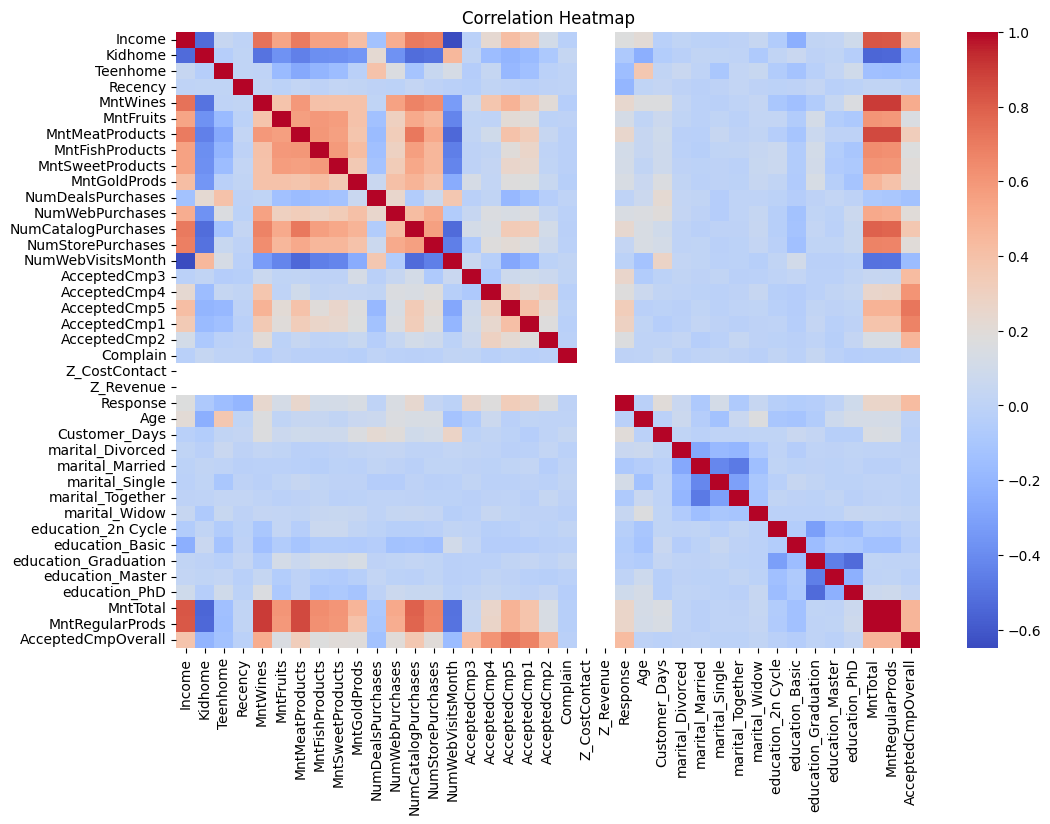

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
features = ['Income', 'MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntWines',
            'MntSweetProducts', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases']
target = 'Response'

data = data.dropna()

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

print("====================== Confusion Matrix ======================")
print(confusion_matrix(y_test, y_pred))

print("====================== Classification Report ======================")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8701
====================== Confusion Matrix ======================
[[555  16]
 [ 70  21]]
====================== Classification Report ======================
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       571
           1       0.57      0.23      0.33        91

    accuracy                           0.87       662
   macro avg       0.73      0.60      0.63       662
weighted avg       0.84      0.87      0.85       662



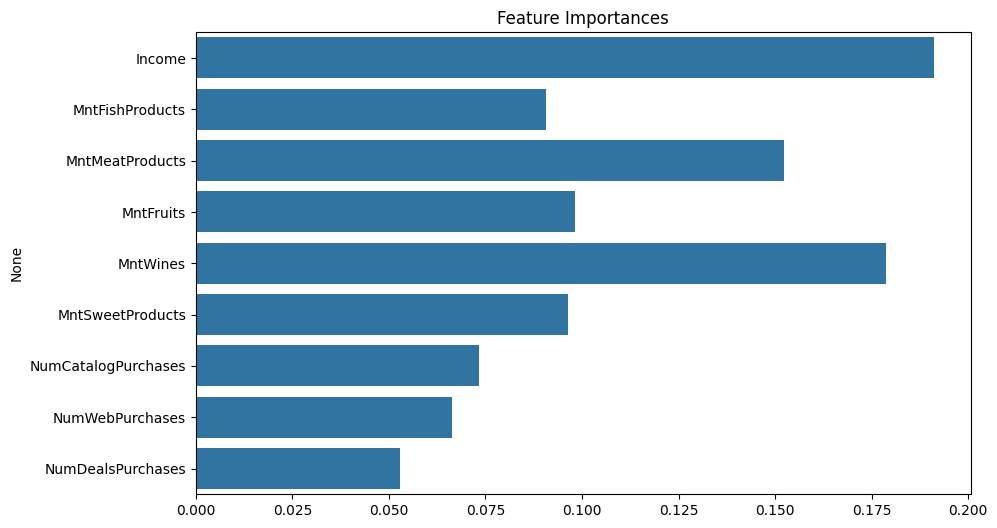

In [10]:
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.show()
